# Project Title:- Face Recognition using Deep Learning

#### Aim:- To verify the images based on Previous Label Data 

 <b>Student Name</b>
#### 1) Nitin Borse
#### 2) Ashraf Ali
#### 3) Rashmi Patil
#### 4) Tejal Sarvade                                                                                         
                                                                       # Guided By :Ankita kanchan

### Problem Statement

- <b> Given an Image, to identify it as a face and/or extract face images from it </b>

- <b>To retrieve the similar Images from the given dataset of face images </b>

## Images Collection Code
This code used for collection of dataset

In [3]:
import cv2
import numpy as np

# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]

    return cropped_face

# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 40

# Collect 100 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        #file_name_path = './data/'+"Poonam." + str(count) + '.jpg'
        file_name_path = "Images for visualization/"+str(count)+'.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 20: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-3-67dfec1927bc>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


# Create label

In [4]:
import numpy as np # pip install numpy

In [5]:
def my_label(image_name):
    name = image_name.split('.')[-3]   # to split Nitin.1.jpg
    if name=="Nitin":
        return np.array([1,0,0])
    elif name=="Harshada":
        return np.array([0,1,0])
    elif name=="Poonam":
        return np.array([0,0,1])

# create data

In [ ]:
# Load Important Libraries

In [6]:
import os
from random import shuffle
from tqdm import tqdm

<b> What is tqdm?</b>
- tqdm is a Python library that allows you to output a smart progress bar by wrapping around any iterable. A tqdm progress bar not only shows you how much time has elapsed, but also shows the estimated time remaining for the iterable.

In [7]:
def my_data():
    data = []
    for img in tqdm(os.listdir("data")):
        path=os.path.join("data",img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        data.append([np.array(img_data), my_label(img)])
    shuffle(data)  
    return data

In [8]:
data = my_data()

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 560.54it/s]


In [ ]:
# assign the train and test data

Train/Test is a method to measure the accuracy of your model. It is called Train/Test because you split the the data set into two sets: a <b>training set</b> and a <b>testing set</b>. 80% for training, and 20% for testing. You train the model using the training set.

In [9]:
train = data[:240]  
test = data[240:]
X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(X_test.shape)
y_test = [i[1] for i in test]

(240, 50, 50, 1)
(60, 50, 50, 1)


# Creating the model

In [10]:
# import warnings
# warnings.filterwarnings('ignore')

import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [11]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
convnet = input_data(shape=[50,50,1])
convnet = conv_2d(convnet, 32, 5, activation='relu')
# 32 filters and stride=5 so that the filter will move 5 pixel or unit at a time
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 3, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate = 0.001, loss='categorical_crossentropy')
model = tflearn.DNN(convnet, tensorboard_verbose=1)
model.fit(X_train, y_train, n_epoch=12, validation_set=(X_test, y_test), show_metric = True, run_id="FRS" )

Training Step: 47  | total loss: 0.62734 | time: 0.828s
| Adam | epoch: 012 | loss: 0.62734 - acc: 0.7732 -- iter: 192/240
Training Step: 48  | total loss: 0.55694 | time: 2.115s
| Adam | epoch: 012 | loss: 0.55694 - acc: 0.8021 | val_loss: 0.04046 - val_acc: 1.0000 -- iter: 240/240
--


The model shows an accuracy of ~80%. To demonstrate the performance of the model, we can see how it classifies a sampling of images from the dataset.

# Let's visualize the data and make prediction

In [12]:
def data_for_visualization():
    Vdata = []
    for img in tqdm(os.listdir("Images for visualization")):
        path = os.path.join("Images for visualization", img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata

In [13]:
Vdata = data_for_visualization()

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 74.71it/s]


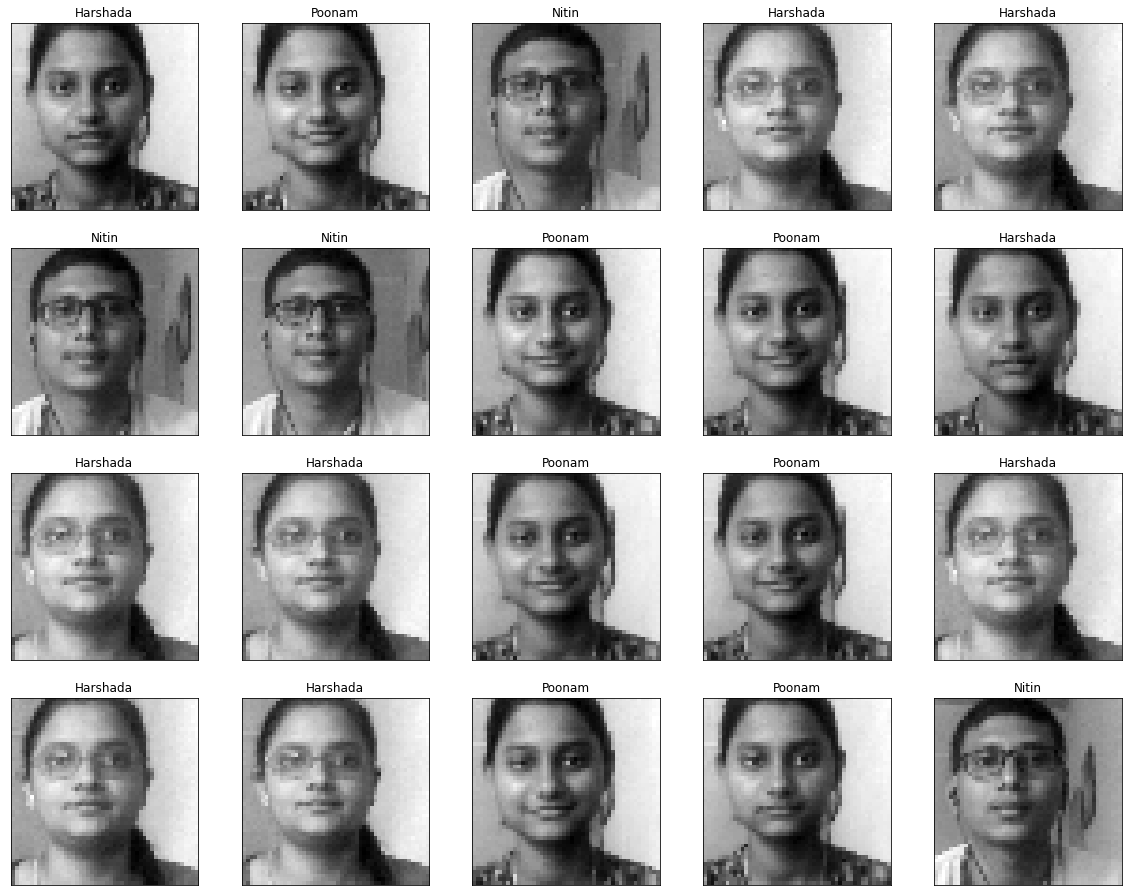

In [14]:
import matplotlib.pyplot as plt   # pip install matplotlib

fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 0:
        my_label = 'Nitin'
    elif np.argmax(model_out) == 1:
        my_label = 'Harshada'
    else:
        my_label = 'Poonam'
        
    y.imshow(image, cmap='gray')
    plt.title(my_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

### Facial Recognition Applications Overview
Based on our assessment of the applications in the field today, the a majority of facial recognition use-cases appear to fall into three major categories:

- 1)<b>Security</b>: Companies are training deep learning algorithms to recognize fraud detection, reduce the need for traditional passwords, and to improve the ability to distinguish between a human face and a photograph.
- 2)<b>Healthcare</b>: Machine learning is being combined with computer vision to more accurately track patient medication consumption and support pain management procedures.
- 3)<b>Marketing</b>: Fraught with ethical considerations, marketing is a burgeoning domain of facial recognition innovation, and it’s one we can expect to see more of as facial recognition becomes ubiquitous.

# Conclusion

- In this project we use the  Convolutional-Neural-Network Deep learning model and model predicted 80% accuracy.